### Q1 (5 points). P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03
For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

## Ans 1)

### Null Hypothesis: $H_0:w_j=w_j^0$

Since The regression coefficient is zero, i.e. the impact of considered regressor  $wj$ is zero.

### The threshold value $\alpha$ = 0.05

#### If then p value is greater than the threshold, we reject the regressors since to reject the null hypothosis with statistical significance of 95%, the p value should be less than the threshold.($\alpha$)

## So we reject the null hypothesis for 5 regressors(0.02, 3e-15, 0.04, 0.001, 0.03) and hence we can not reject the null hypothesis for 2 regressors(0.06,0.1).

### Q2 (5 points). Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

c. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

# Ans 2)

## The estimate 10 for the slope coefficient should fall within its confidence interval and estimate is between the interval, so following statements will not be true:

### a. 95%-confidence interval is [-5, 5]
### c. 95%-confidence interval is [9,100]

### Q3.(Car Price Example, 20pts)
You are given a dataset containing the information regarding car prices:
'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls'  

**VARIABLE DESCRIPTIONS:** (Data was collected in 2005)
* Price: suggested retail price of the used 2005 GM car in excellent condition. The condition of a car can greatly affect price. All cars in this data set were less than one year old when priced and considered to be in excellent condition. 
* Mileage: number of miles the car has been driven
* Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
* Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
* Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
* Type: body type such as sedan, coupe, etc.
* Cylinder: number of cylinders in the engine	
* Liter: a more specific measure of engine size	
* Doors: number of doors	
* Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
* Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
* Leather: indicator variable representing whether the car has leather seats (1 = leather)
  
Run the regression modeling the price through all the features above except 'Model","Trim" and "Type" and analyse its statistics. Based on the results suppose there's a price X you have to pay for each additional Liter of your tank capacity, then:
* (a) What's the expected price E(X)?  
* (b) What's the probability that X > \$4500?  
* (c) What's the two-sided 90% confidence interval of X?
* (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

from scipy.stats import t

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
carData = pd.read_excel("https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Car.xls", sheet = 'Cars Lab Data')
print(carData.shape)
carData.head()

(804, 12)


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
carData.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


#### Regression model of Car Price through Mileage

In [4]:

# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'Price ~ %s'%feature, data = carData).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Price'):
    lmy = lm.predict(carData)
    y_err = lmy - carData[key]
    y_norm = carData[key]-mean(carData[key])
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. validation set
    print('Validation R^2 is %f'%R2)
    print(lm.summary())
    plt.figure(figsize = (8,8))
    plt.plot(lmy, lmy, 'b-', label = "Prediction line")
    plt.plot(lmy, carData[key],'or')
    plt.ylabel("Car Price")
    plt.legend()

Validation R^2 is 0.020463
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           4.68e-05
Time:                        11:48:41   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.476e+04    

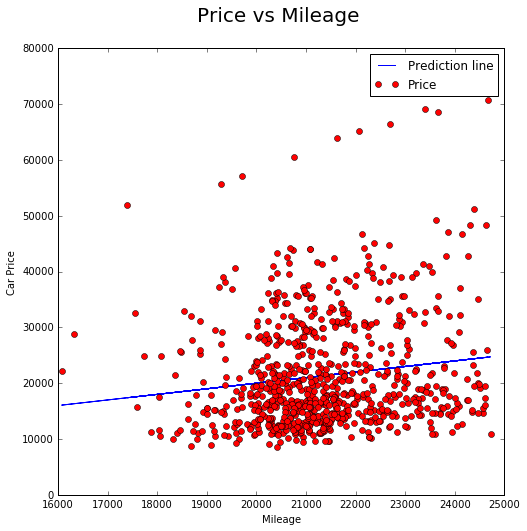

In [5]:
MileageRegModel = Regress('Mileage')
modelEval( MileageRegModel )
plt.xlabel("Mileage")
plt.title("Price vs Mileage \n", size = 20)

### Regression model of Car Price through Make

Validation R^2 is 0.644693
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 24 Oct 2016   Prob (F-statistic):          1.53e-176
Time:                        11:48:41   Log-Likelihood:                -8120.1
No. Observations:                 804   AIC:                         1.625e+04
Df Residuals:                     798   BIC:                         1.628e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

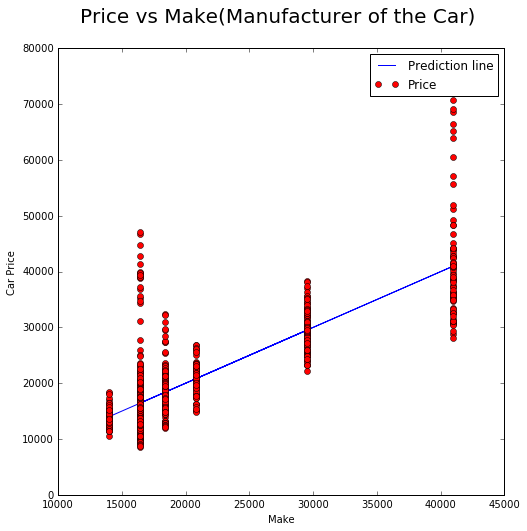

In [6]:
MakeRegModel = Regress('Make')
modelEval( MakeRegModel )
plt.xlabel("Make")
plt.title("Price vs Make(Manufacturer of the Car) \n", size = 20)

### Regression model of Car Price through Cylinder

Validation R^2 is 0.323859
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     384.1
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           3.45e-70
Time:                        11:48:41   Log-Likelihood:                -8378.8
No. Observations:                 804   AIC:                         1.676e+04
Df Residuals:                     802   BIC:                         1.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.0575   1

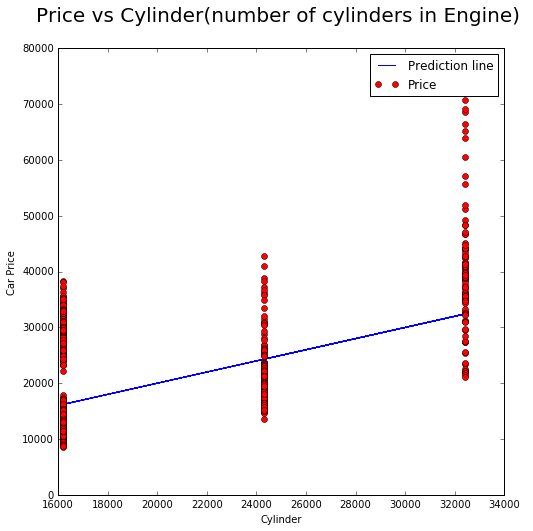

In [7]:
CylinderRegModel = Regress('Cylinder')
modelEval( CylinderRegModel )
plt.xlabel("Cylinder")
plt.title("Price vs Cylinder(number of cylinders in Engine) \n", size = 20)

### Regression model of Car Price through Doors

Validation R^2 is 0.311527
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     362.9
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           4.95e-67
Time:                        11:48:42   Log-Likelihood:                -8386.1
No. Observations:                 804   AIC:                         1.678e+04
Df Residuals:                     802   BIC:                         1.679e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6185.7547    

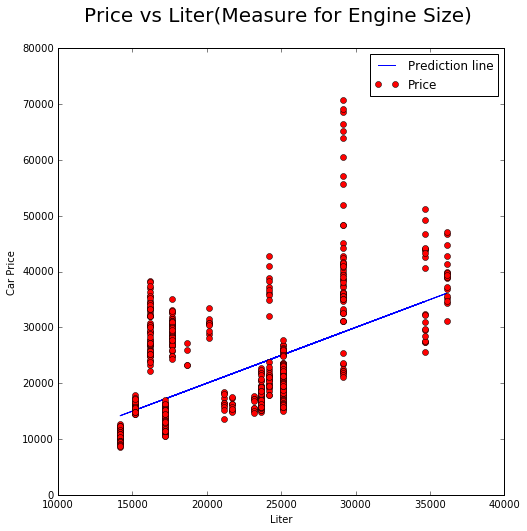

In [8]:
LiterRegModel = Regress('Liter')
modelEval( LiterRegModel )
plt.xlabel("Liter")
plt.title("Price vs Liter(Measure for Engine Size) \n", size = 20)

### Regression model of Car Price through Doors

Validation R^2 is 0.019251
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     15.74
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           7.91e-05
Time:                        11:48:42   Log-Likelihood:                -8528.3
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.703e+04   1

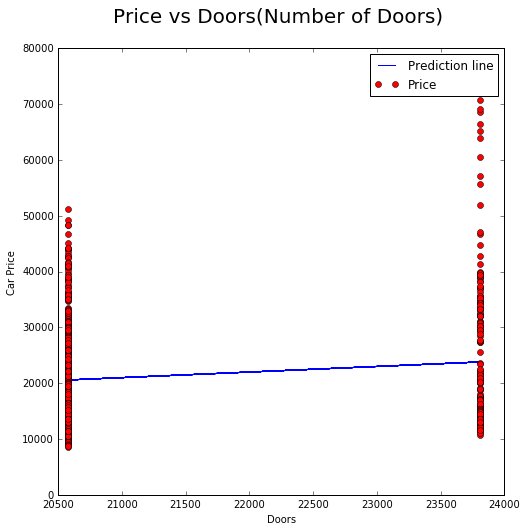

In [9]:
DoorRegModel = Regress('Doors')
modelEval( DoorRegModel )
plt.xlabel("Doors")
plt.title("Price vs Doors(Number of Doors) \n", size = 20)

### Regression model of Car Price through Cruise

Validation R^2 is 0.185633
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           1.13e-37
Time:                        11:48:42   Log-Likelihood:                -8453.6
No. Observations:                 804   AIC:                         1.691e+04
Df Residuals:                     802   BIC:                         1.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.392e+04    

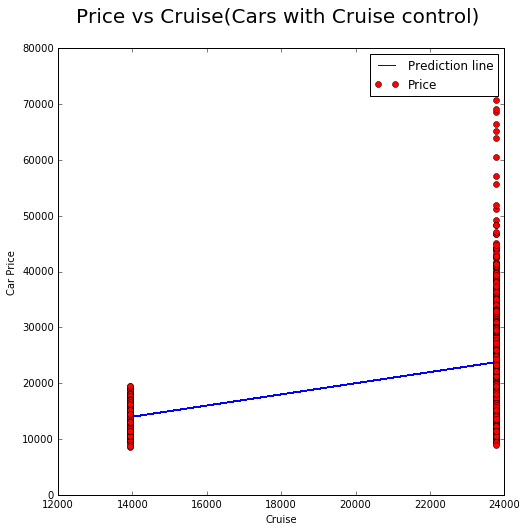

In [10]:
CruiseRegModel = Regress('Cruise')
modelEval( CruiseRegModel )
plt.xlabel("Cruise")
plt.title("Price vs Cruise(Cars with Cruise control) \n", size = 20)

### Regression model of Car Price through Sound

Validation R^2 is 0.015462
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           0.000409
Time:                        11:48:43   Log-Likelihood:                -8529.9
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.313e+04    

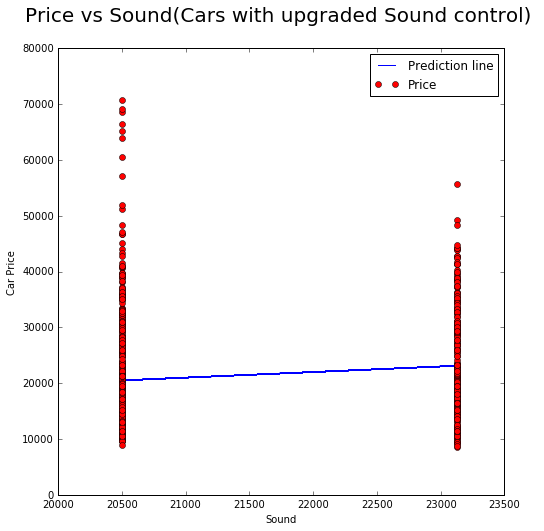

In [11]:
SoundRegModel = Regress('Sound')
modelEval( SoundRegModel )
plt.xlabel("Sound")
plt.title("Price vs Sound(Cars with upgraded Sound control) \n", size = 20)

### Regression model of Car Price through Leather

Validation R^2 is 0.024711
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     20.32
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           7.53e-06
Time:                        11:48:43   Log-Likelihood:                -8526.1
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.883e+04    

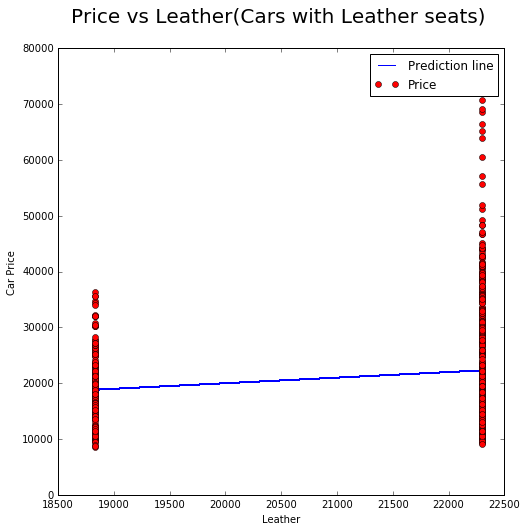

In [12]:
LeatherRegModel = Regress('Leather')
modelEval( LeatherRegModel )
plt.xlabel("Leather")
plt.title("Price vs Leather(Cars with Leather seats) \n", size = 20)

### Regression model of Car Price through All the Features

Validation R^2 is 0.879041
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.0
Date:                Mon, 24 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:48:44   Log-Likelihood:                -7687.0
No. Observations:                 804   AIC:                         1.540e+04
Df Residuals:                     791   BIC:                         1.546e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


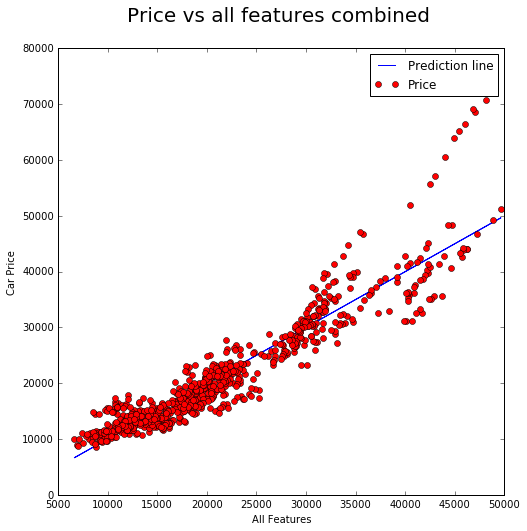

In [13]:
allRegModel = Regress('Mileage+ Make + Cylinder+ Liter+ Doors+ Cruise +Sound +Leather')
modelEval( allRegModel )
plt.xlabel("All Features")
plt.title("Price vs all features combined \n", size = 20)
carData.corr()

## In this summary table we can see that the coefficients are implying:
* Avg. Base price   \$15,720
* Avg. Additional Price per Mileage  \$-0.1804
* Ave. Additional Price per Cylinder  \$-215.0175    
* Avg. Additional Price per Liter \$4760.4180
* Avg. Additional Price per Door \$-1710.0569
* Avg. Additional Price per Cruise control \$-503.8479
* Avg. Additional Price per Sound upgradation \$-44.0784
* Avg. Additional Price per Leather \$25.4588

### So, the more additional Liter you add to your tank capacity, the higher the price of car.

### (a) What's the expected price E(X)?

In [14]:
allRegModel.params.Liter

4760.4180231871624

### (b) What's the probability that X > $4500?

In [15]:
# Higher than 4500:
t.sf((4500 - allRegModel.params['Liter'])/allRegModel.bse['Liter'],
     allRegModel.df_resid)

0.7142783923418341

### (c) What's the two-sided 90% confidence interval of X?

In [16]:
allRegModel.conf_int(alpha = 0.1).ix[[-5]]  #90% confidence interval of X

,0,1
Liter,4002.948181,5517.887866


### (d) What's the one-sided 90% confidence interval of X? Calculate the upper interval  [X0,+∞)[X0,+∞) 

In [17]:
q = 1-0.9
upperBound = t.isf(q, allRegModel.df_resid) * allRegModel.bse['Liter']\
                                                  + allRegModel.params['Liter']
print("The Upper Bound with 90% CI:", upperBound)

The Upper Bound with 90% CI: 5350.38553917


### Q4. Dimension reduction using PCA.  (40 pts)

Let's see the handwriting digits data set. This data set includes 1787 digits. And for each digit, we have 64 binary variables x1,x2,...x64, each one representing a pixel on the 8x8 image (1-belongs to an image, 0-blank). The label (y) for each digit image is the actual digit it represents from 0 to 9.  

In [18]:
#Run the following code.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


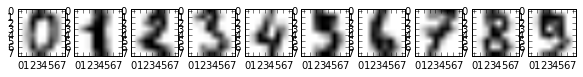

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Let's start our questions. 

#### Part one. We have 64-dimension feature space(exclude y) X.  (5pts+5pts)
a. Assume we need to use PCA to transform X to Xproj.Plot the explained variance for each eigenvector(direction) from high to low in one scatter plot. 

b. What is the total variance of X? How many eigenvectors(directions) do we need to choose if we want to preserve 90% variance of the original data.

#### Part two. Let's use PCA to reduce the dimensionality of digits data set from 64 to 3. And then  visulize the transformed space on a 3 dimensional plot. Please color the points with respect to their label y. (10 pts)

#### Part three. Take the data for digits 3 and 8 from the origional data set and call it data1. (20pts)
a. If we use PCA for dimensionality reduction on data1, how big is the percentage of total variance, that the first and second eigenvectors could explain? 

b. Now let's visulize the dimensional feature space of data1 by the first two eigenvectors. Color your points according to the digits they represent.

c. Visulize the feature space using third and fourth eigenvectors(directions).

d. Visulize the feature space using the last two eigenvectors(directions).


### Part1 a)

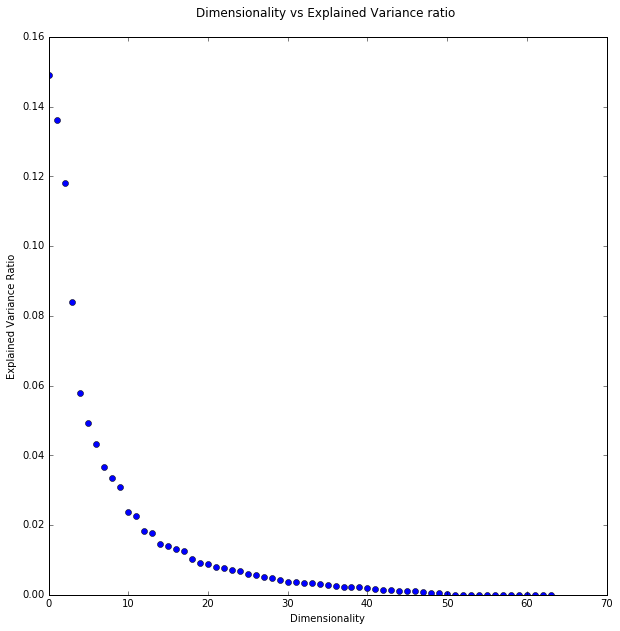

In [20]:
 # how many eigenvectors we choose
X = data.iloc[:,1:]
Y = data.loc[:,'y']

n=64

pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.explained_variance_
plt.figure(figsize = (10,10))
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.title("Dimensionality vs Explained Variance ratio \n")
plt.show()


### Part1 b)

In [21]:
print("total variance:{}".format(np.sum(np.var(X,0))))

total variance:1201.4787373626168


In [22]:

pca = PCA(0.90)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.explained_variance_
print ('90% Variance with is preserved by {} eigenvectors'.format(pca.n_components_))
print("% preserved by 21 eigenvectors is:",(sum(eigenvalues))*100)

90% Variance with is preserved by 21 eigenvectors
% preserved by 21 eigenvectors is: 90.3198501204


### Part2

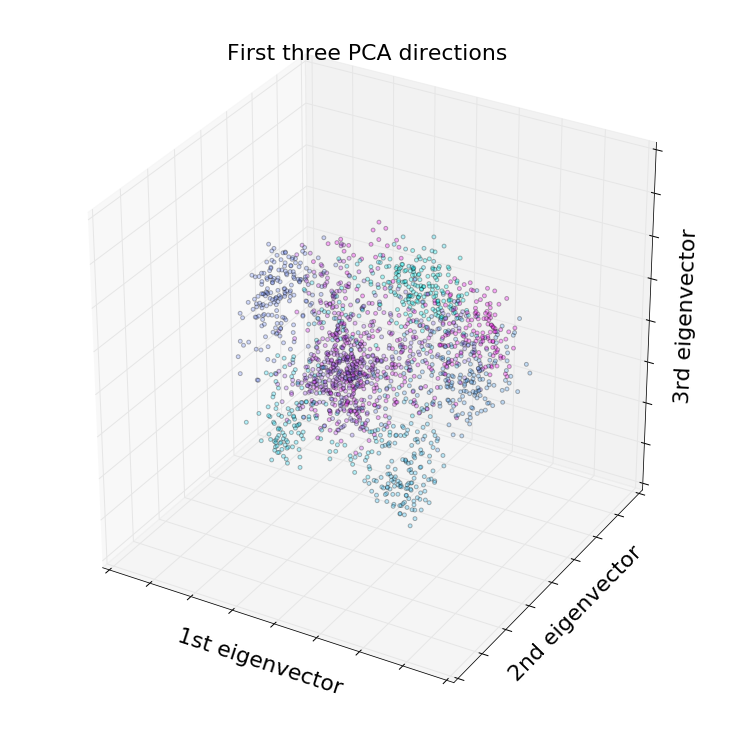

In [23]:
n=64
pca = PCA(n)
Xproj1 = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.explained_variance_

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=60)
ax.scatter(Xproj1[:, 0], Xproj1[:, 1], Xproj1[:, 2], c=Y.values,
           cmap=plt.cm.cool, alpha = 0.3, s = 15,)
ax.set_title("First three PCA directions", fontsize = 22)
ax.set_xlabel("1st eigenvector", fontsize = 22)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector", fontsize = 22)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector", fontsize = 22)
ax.w_zaxis.set_ticklabels([])

plt.show()


### Part3a)

In [24]:
data1 = []
for i in range(len(data)):
    if (data.y[i] == 3 or data.y[i] == 8):
        data1.append(data.iloc[i,:])
data1 = pd.DataFrame(data1)
#pandas 0.18.0 and higher
X1 = data1.iloc[:,1:]
Y1 = data1.loc[:,'y']
X1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0


### Part3 a)

In [25]:
n= 64
pca = PCA(n)
Xproj2 = pca.fit_transform(X1)
eigenvalues = pca.explained_variance_ratio_
print("The total variance explained by eigenvalues 1 and 2 is {}%".format((eigenvalues[0] + eigenvalues[1])*100))

The total variance explained by eigenvalues 1 and 2 is 36.228178439510614%


### b)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


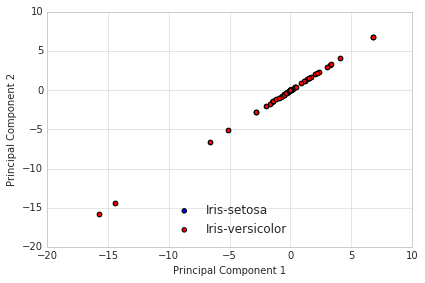

In [45]:
# plt.figure(2, figsize=(8, 6))
# plt.clf()
# # Plot the training points
# plt.scatter(Xproj2[:, 0], Xproj2[:, 1], c = Y1, cmap=plt.cm.cool)
# plt.xlabel('First Eigenvalue')
# plt.ylabel('Second Eigenvalue')
# plt.show()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor'), 
                        ('blue', 'red')):
        plt.scatter(Xproj2[y==lab, :],
                    Xproj2[y==lab, :],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### c)

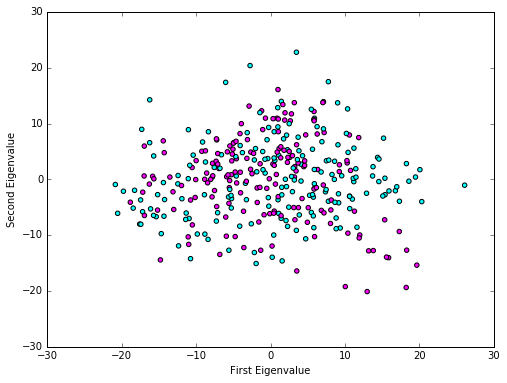

In [27]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj2[:, 2], Xproj2[:, 3], c = Y1 , cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

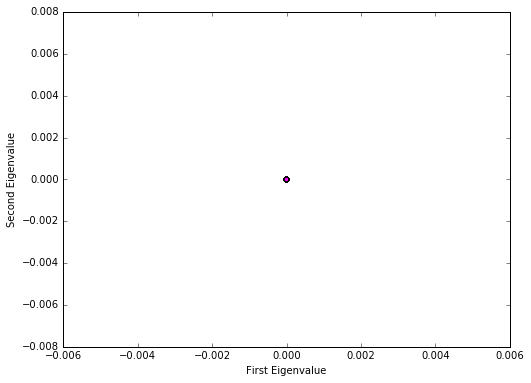

In [28]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj2[:, -2], Xproj2[:, -1], c = Y1, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

##### Q5. (30 pts)

In [29]:
data=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474//ADS_Data/session06/data_hw_3_4.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


#### A. Run a linear regression : Y~x1+..+x15 (without constant) and report the summary of this regression result. (5pts)

In [30]:
# Using Sklearn
ols=LinearRegression(fit_intercept=False)
ols.fit(data.iloc[:,1:],data.loc[:,'Y'])
print (ols.coef_)

[  3.30258760e+00  -4.86088640e+00  -4.06746944e+00   3.28908333e+00
   4.60963667e+00  -2.63044140e-03  -3.57527486e-02  -1.49487580e-01
   5.63942595e-02  -1.86047791e-02  -3.10677586e-02   5.53492856e-02
  -6.76472912e-02  -9.38515166e-02   2.64579849e-02]


In [31]:
x=data.iloc[:,1:]
y=np.asarray(data.Y)

res=sm.OLS(y,x).fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     7.682
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           3.73e-07
Time:                        11:48:47   Log-Likelihood:                -64.562
No. Observations:                  50   AIC:                             159.1
Df Residuals:                      35   BIC:                             187.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3026      1.692      1.951      0.0

#### B. Demonstrate the overfitting problem by 1000 times cross-validation.  Report average OS and IS R-squared.  (10 pts)

In [32]:
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 1000)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.8179926793479608
OS R-squared for 1000 times is -0.9785575476315018


#### C. Repeat A and B on features after feature selection(p value<0.05). (5pts)

In [33]:
res=sm.OLS(y,x.iloc[:,[7,12,13]]).fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1933
Date:                Mon, 24 Oct 2016   Prob (F-statistic):              0.900
Time:                        11:48:48   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x8             0.0054      0.046      0.116      0.9

In [34]:
R_IS=[]
R_OS=[]
n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(x.iloc[:,[7,12,13]]), y, test_size=0.33)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.009430233081178312
OS R-squared for 1000 times is -0.27151766383744164


#### D. Transform the data set by PCA and keep all 15 eigenvectors(directions). Call the new data set after transformation Xproj. And repeat questions A and B using Xproj. (10 pts)

In [35]:
n=15 # how many eigenvectors we choose
pca1 = PCA(n)
Xproj3 = pca1.fit_transform(x)

In [36]:
res=sm.OLS(y,pd.DataFrame(Xproj3)).fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           5.31e-09
Time:                        11:48:50   Log-Likelihood:                -57.896
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      35   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0200      0.004      5.321      0.0

In [37]:
R_IS=[]
R_OS=[]
n=1000

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj, y, test_size=0.4, random_state =1500)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

ValueError: Found input variables with inconsistent numbers of samples: [1797, 50]

## Extra-credit assignment 

### EC1 (20 points) "Real" out of sample test. 

Review the cross-validation process of last question carefully, you will find the cross-validation is somehow "fake". The reason is that we accessed the information of validation set when we apply PCA on the whole data set.(You should know why). Redo the cross-validation part for question D in previous question. Run 100 times "real" cross-validation and report OS and IS R-squared. 

Hint: for each loop, split the data set to train and validation set, and using PCA only on training set to find the siginificant eigenvectors(directions), and then transform the test data the same way and pick the same eigenvectors for regression.    

In [ ]:
X2 = data.iloc[:,1:]
Y2 = data.loc[:,'Y']

R_IS=[]
R_OS=[]

n=100
    
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    
    X_train = pca1.fit_transform(X_train)
    X_test = pca1.fit_transform(X_test)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())

print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

### EC2. When PCA could not work?  (20 points). 

Generate a 2 dimensional feature space with labels to show PCA does not work in the case you made. Plot your data set and explain your reason. This is an open question. Any data set which have two dimensional feature space with good explaination why PCA does not work should be fine.

### EC3.(Multiple choice, 5pts. Please add short explaination)
Suppose you have two different feature selection choices A and B, and we have already separated the dataset into training set and validation set. Now we want to use "out-of-sample" $R^2$ to evaluate the model prediction power. The regular $R^2$ and adjusted $R^2$ are denoted as $R_A^2$($R_B^2$) and $adR_A^2$ ($adR_B^2$), respectively. Select all statements that are true: 

A. For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$  
B. For each selection, we may have $R_A^2 < adR_A^2$ or $R_B^2 < adR_B^2$  
C. If $R_A^2 > R_B^2$ then $adR_A^2$ must be greater than $adR_B^2$, vice versa  
D. If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa  

### Answer:
#### A)For each selection, we always have $R_A^2 > adR_A^2$ and $R_B^2 > adR_B^2$. 

The formula for adjusted R^2 is $\frac{N-1}{N-K-1}$ which makes it smaller than R^2 

#### D)If $R_A^2 > R_B^2$, $adR_A^2$ still can be less than $adR_B^2$, vice versa. 

The number of samples i.e Value of k affect the adj. R^2, If K is big the adjusted R^2 of model will be high so that is possible in the case.